# Combined Cycle Power Prediction

Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

**To develop a predictive model for full-load output power (PE) based on the dataset provided. **

In [135]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

In [5]:
df = pd.read_excel(r'C:\Users\HP\Downloads\py\Combined Cycle Power Prediction\CCPP\CCP.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**The dataset consists of 4 hourly average variables or features and the target variable which is the Output Power (PE)**

Because the goal of regression is to create a mathematical model from the features to predict the target variable (PE), we need to ensure that we select features that have a strong correlation (high predictive power) with the target

<AxesSubplot:>

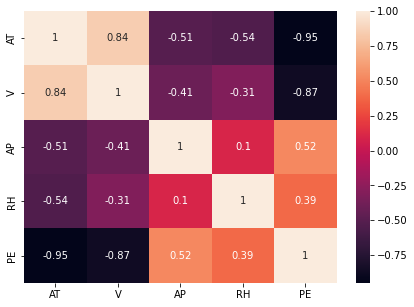

In [10]:
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

From the correlation matrix, we can see that AT and V have a strong negative correlation with the target variable (PE) as their correlation coefficients are -0.95 and -0.87 respectively. AP and RH have a weak positive correlation with PE with correlation coefficients of 0.52 and 0.39.

**We can visualize the bivariate distribution of the dataset (which shows how each feature correlates to each other and the PE)**

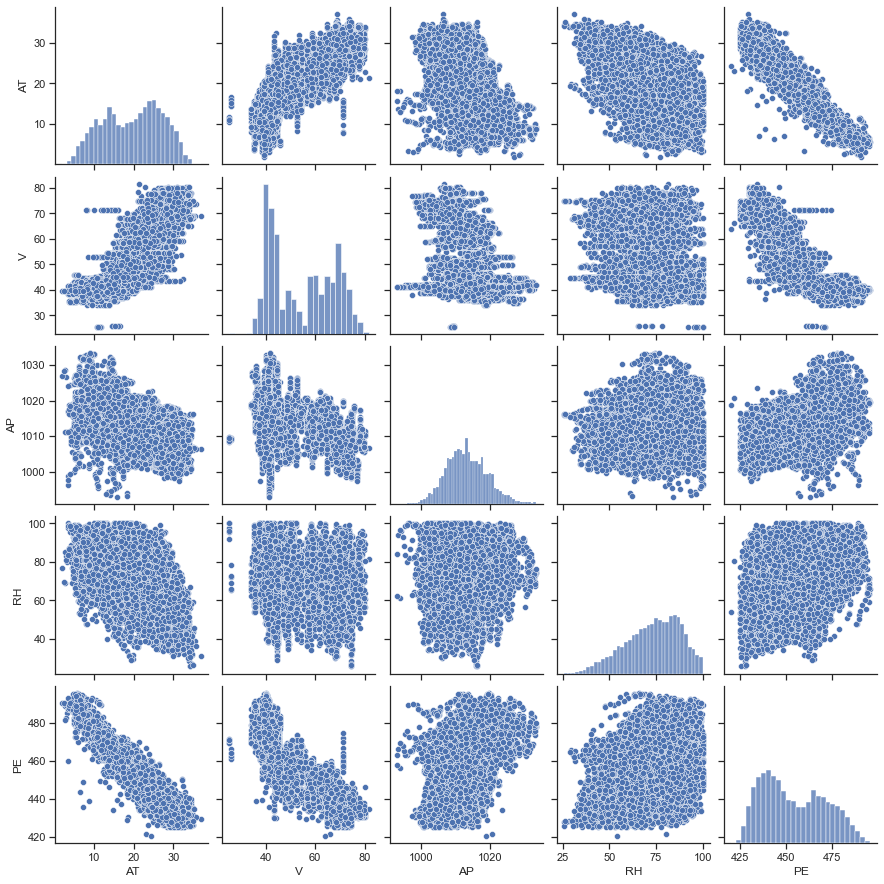

In [12]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind = 'hist')

**Caution**: You will notice that AT and V are highly correlated with each other. This is usually not a good thing as our features should be independent of each other. This problem is called multicollinearity. One way of solving this problem is to select the feature(s) that more strongly correlates with our target variable (PE). In this case that will be AT (-0.95).

# Model Development

**Feature Selection**
A critical part of the success of a machine learning project is coming up with a good set of features or predictors to train on. Feature selection involves selecting the most useful features to train on amongst existing features

# Training the models

# Liear Regression Model

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
 


In [70]:
model = LinearRegression()
forward_feature_selection = sfs(model,
                                k_features = 4,
                                  forward = True,
                                verbose = 2,
                                cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-10-02 14:46:14] Features: 1/4 -- score: 0.8971657024327804[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-10-02 14:46:14] Features: 2/4 -- score: 0.9195374034102197[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-10-02 14:46:14] Features: 3/4 -- score: 0.9271453488384658[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [73]:

model = LinearRegression()
score1 = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'r2')
score2 = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())



The rms value is 4.5904360950431276
The r square value is 0.9274549454515679


# Random Forest Model

In [84]:
rf_regressor= RandomForestRegressor()

In [86]:
n_estimators = [10,15,20,30] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [2,3,5,10,20] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

In [88]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [90]:
rf_random = RandomizedSearchCV(estimator = rf_regressor,param_distributions = random_grid,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [91]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [10, 15, 20, 30]},
                   random_state=35, verbose=2)

In [92]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [102]:
randmf = RandomForestRegressor(n_estimators=30,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False)


In [103]:
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=30)

In [105]:
 score3a = cross_val_score(randmf,X_train, y_train, cv =5, scoring ='neg_root_mean_squared_error')
score3b = cross_val_score(randmf,X_train, y_train, cv =5, scoring ='r2')

In [106]:
rmsescorea3= np.abs(score3a).min
r2scorea3 =score3b.max
print("The rmse score is", rmsescorea3().min())
print("The R square value is", r2scorea3().max())

The rmse score is 3.248037978903543
The R square value is 0.9629563343638105


In [107]:
randmf.feature_importances_

array([0.56351376, 0.35669254, 0.06253563, 0.01725807])

In [110]:
importance = randmf.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X_train.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['AT', 'V', 'AP', 'RH']


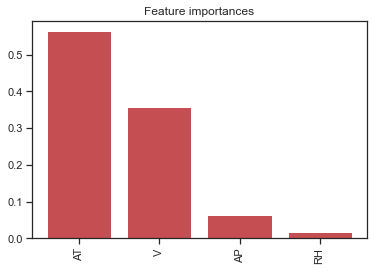

In [111]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

# XGBoost Regressor

In [113]:
xg_model = XGBRegressor(n_estimators=100, seed = 1234)
param_dict = {'max_depth': [3,4,5],
              'min_child_weight': [2,3,4],
              'learning_rate': [0.05, 0.1,0.15],
              'gamma': [0.0, 0.1, 0.2]
}

In [114]:
xgboost_random = RandomizedSearchCV(estimator = xg_model,param_distributions = param_dict,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [115]:
xgboost_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.05, 0.1, 0.15],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [2, 3, 4]},
                   random_state=35, verbose=2)

In [116]:
xgboost_random.best_params_

{'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1}

In [117]:
xg_model = XGBRegressor(n_estimators = 100,
                        learning_rate = 0.15,
                        max_depth = 5,
                        min_child_weight = 2,
                        gamma = 0.1)
 

In [118]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [119]:

score4a = cross_val_score(xg_model,X_train, y_train, cv =5, scoring ='neg_root_mean_squared_error')
score4b = cross_val_score(xg_model,X_train, y_train, cv =5, scoring ='r2')

In [120]:
rmsescorea4= np.abs(score4a).min
r2scorea4 =score4b.max
print("The rmse score is", rmsescorea4().min())
print("The R square value is", r2scorea4().max())

The rmse score is 3.3904084620584047
The R square value is 0.9591695642421325


# Testing the Models

# Testing with Linear Regression Model

In [121]:

model = LinearRegression()
model.fit(X_train, y_train) 


LinearRegression()

In [123]:
pre=model.predict(X_test)
pre

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

In [128]:
rmslr = mean_squared_error(y_test, pre, squared=False)
mae2 = mean_absolute_error(y_test, pre)
print("RMSE :", rmslr) # RMSE, # squared  If True returns MSE value, if False returns RMSE value
print("MAE :", mae2)


RMSE : 4.442262858442491
MAE : 3.5665646552038224


In [136]:
expl_mlr = explained_variance_score(pre,y_test)
expl_mlr

0.9277919013166557

# Testing with Random Forest Regressor

In [126]:
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=30)

In [127]:
pre2=randmf.predict(X_test)
pre2

array([433.70443122, 457.23282963, 463.07241561, ..., 468.5757119 ,
       438.83433251, 460.96198499])

In [143]:
rmsrf= mean_squared_error(y_test, pre2, squared=False)
mae3= mean_absolute_error(y_test, pre2)
print("RMSE :", rmsrf) # RMSE, # squared  If True returns MSE value, if False returns RMSE value
print("MAE :", mae3)


RMSE : 3.1033696111668343
MAE : 2.2794395949048294


In [137]:
expl_rf = explained_variance_score(pre2,y_test)
expl_rf

0.9653724735290509

# Testing with XGboost Regressor Model

In [130]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [131]:
pre3= xg_model.predict(X_test)

In [144]:
rmsxgboost = mean_squared_error(y_test, pre3, squared=False)
mae4= mean_absolute_error(y_test, pre3)
print("RMSE :", rmsxgboost) # RMSE, # squared  If True returns MSE value, if False returns RMSE value
print("MAE :", mae4)

RMSE : 3.290666320814381
MAE : 2.4901065436575482


In [145]:
expl_xgboost = explained_variance_score(pre3,y_test)
expl_xgboost

0.9611626614978582

# Metrics of Best Model

In [147]:


models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Random forest Regression', 'XGboostRegressor'],
                            'RMSE':[rmslr ,rmsrf, rmsxgboost],
                            'MAE': [mae2,mae3,mae4],
                            'Explained Variance Score':[expl_mlr,expl_rf, expl_xgboost],
                            
                           })
models_score.sort_values(by='RMSE',ascending=False)

,Model,RMSE,MAE,Explained Variance Score
0,Multiple Linear Regression,4.442263,3.566565,0.927792
2,XGboostRegressor,3.290666,2.490107,0.961163
1,Random forest Regression,3.103370,2.279440,0.965372


**Conclusion**: Now that we have evaluated all our models, we can see that the Random Forest Regression Algorithm  gave us the best performance. 